# データ分析入門

# 第１１章　多変量データと確率ベクトル #13


### パッケージ読み込み

In [3]:
# !pip install japanize_matplotlib

In [79]:
# !pip install japanize_matplotlib
# !pip install sympy

%matplotlib inline
import japanize_matplotlib
from matplotlib import pyplot as plt

import pandas as pd
from pathlib import Path
import math
import numpy as np

import sympy as sym


### 正規分布の数値計算

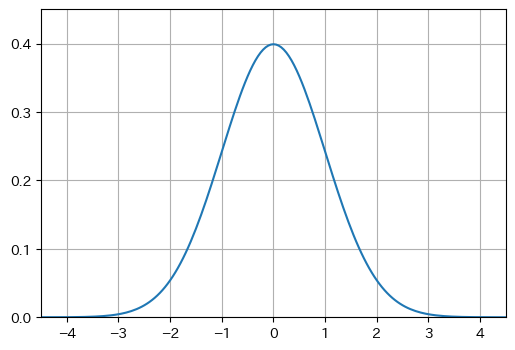

In [80]:
# https://rinsaka.com/python/statistics/01-norm.html
# 横軸用のnumpy配列を準備

from scipy.stats import norm
from scipy.stats import t

x_step = 0.05
x_min = -5
x_max = x_step + 5
x = np.arange(x_min, x_max, x_step)
 
# 標準正規分布
y = norm.pdf(x)
 
# グラフを描く
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(0, 0.45)
ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(0.0, 0.5, 0.1))
ax.grid()
# plt.savefig('normal.png', dpi=300, facecolor='white')
plt.show()

rho =  0.5


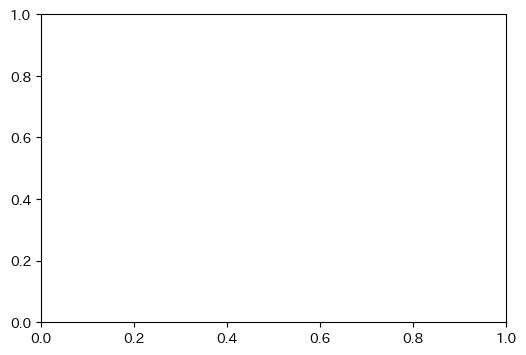

rho =  0.2


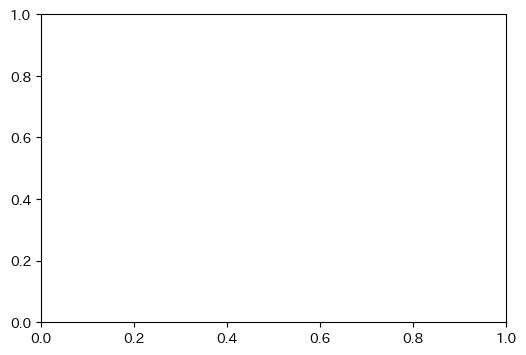

rho =  1


In [8]:
# http://y-okamoto-psy1949.la.coocan.jp/Python/misc/Bysn2VarNorm/
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import math

class BiVarNorm:

    # """

    #         Bivariate normal distribution

    # """

    def __init__(self, rho):

        self.rho = rho

 

    def value(self, x, y):

        v = (x**2 + y**2 - 2 * self.rho * x * y) / (2.0 * (1.0 - self.rho**2))

        v = np.exp(-v) / ((2.0 * math.pi * (1.0 - self.rho**2)) ** 0.5)

        return v


while True:

    rho = float(input('rho = '))

    if math.fabs(rho) >= 1.0:

        break

    fig, ax = plt.subplots(1, 1, figsize=(6, 4))


    ax = Axes3D(fig)

    Xg = np.arange(-4.0, 4.0, 0.1)

    Yg = np.arange(-4.0, 4.0, 0.1)

    X, Y = np.meshgrid(Xg, Yg)

    bi_norm = BiVarNorm(rho)

 

    ax.plot_surface(X, Y, bi_norm.value(X, Y), rstride = 1, cstride = 1, cmap = plt.cm.coolwarm)


    plt.show()

1.0
[[1. 0.]
 [0. 1.]]


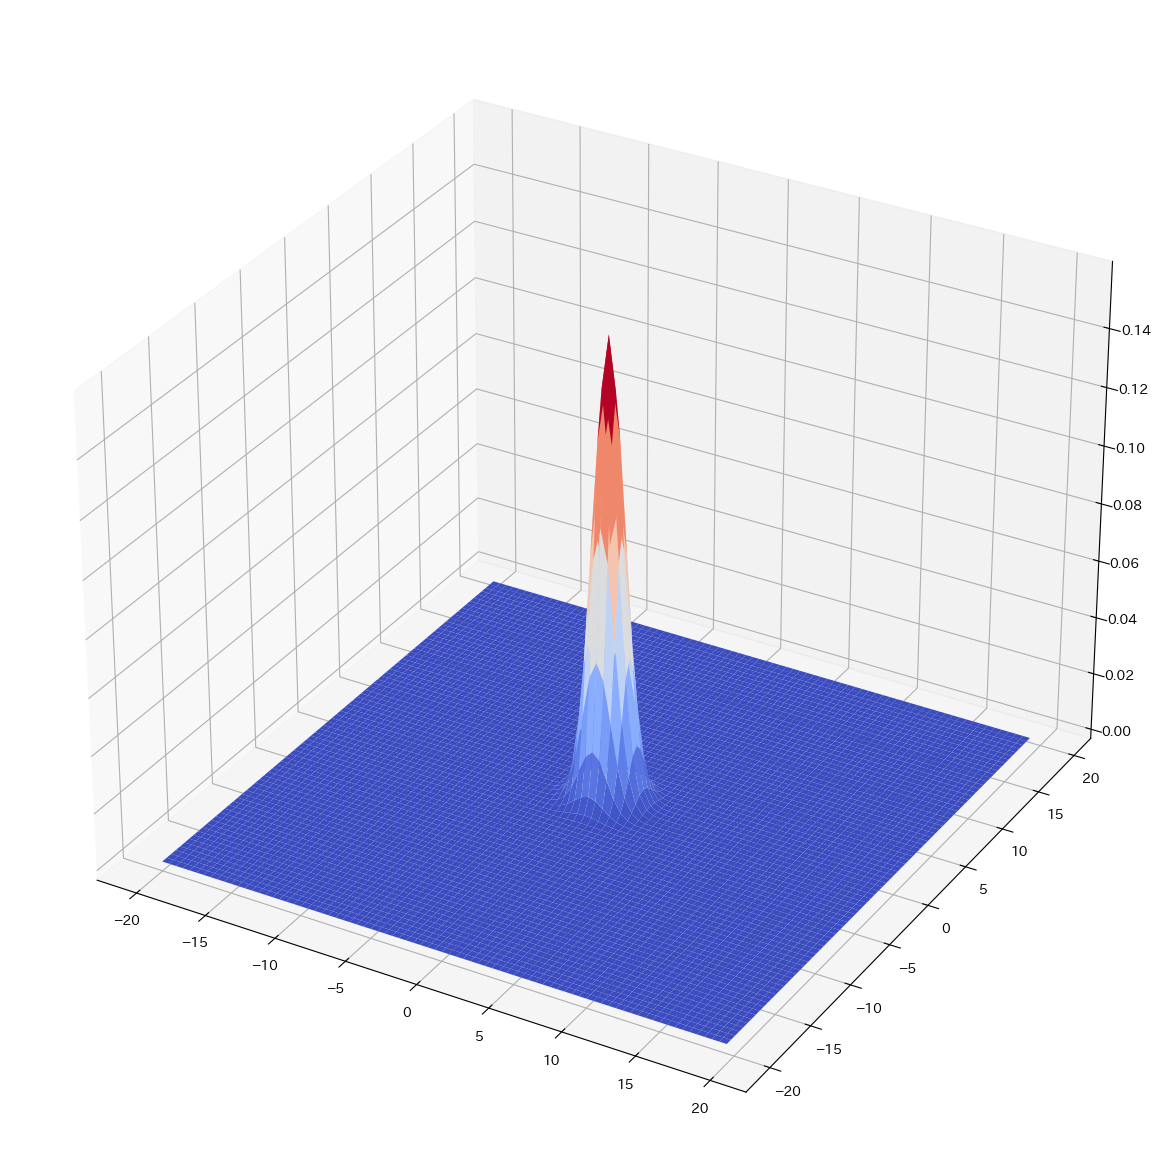

In [9]:
# https://qiita.com/g-k/items/698c7f9e4a213d73197b
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

#関数に投入するデータを作成
x = y = np.arange(-20, 20, 0.5)
X, Y = np.meshgrid(x, y)

z = np.c_[X.ravel(),Y.ravel()]

#二次元正規分布の確率密度を返す関数
def gaussian(x):
    #分散共分散行列の行列式
    det = np.linalg.det(sigma)
    print(det)
    #分散共分散行列の逆行列
    inv = np.linalg.inv(sigma)
    n = x.ndim
    print(inv)
    return np.exp(-np.diag((x - mu)@inv@(x - mu).T)/2.0) / (np.sqrt((2 * np.pi) ** n * det))

#2変数の平均値を指定
mu = np.array([0,0])
#2変数の分散共分散行列を指定
sigma = np.array([[1,0],[0,1]])

Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()


74.99999999999997
[[ 0.13333333 -0.06666667]
 [-0.06666667  0.13333333]]


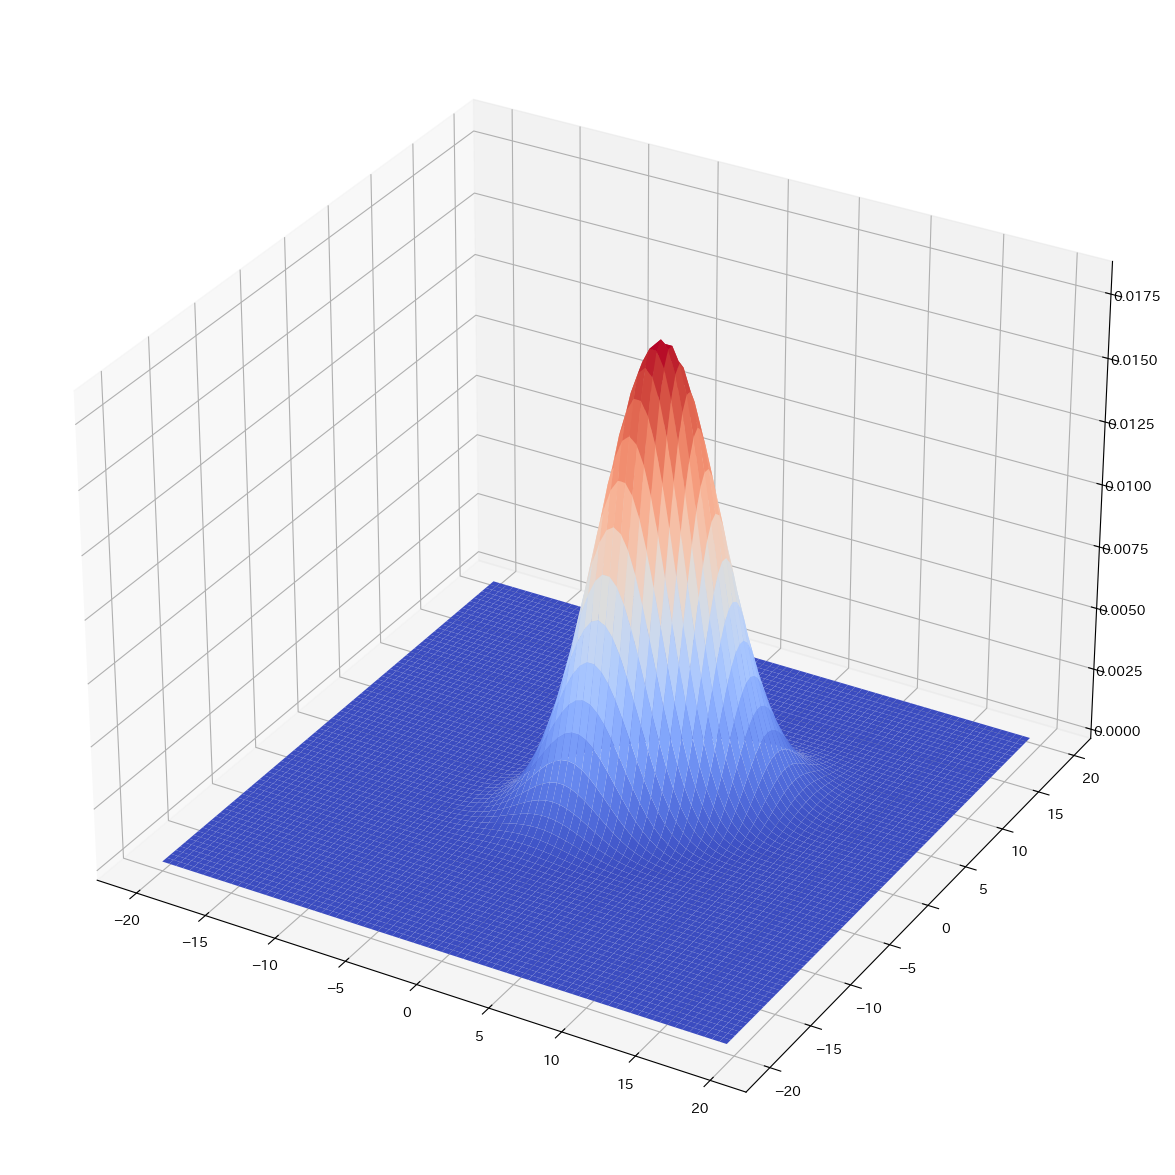

In [11]:
#2変数の平均値を指定
mu = np.array([3,1])
#2変数の分散共分散行列を指定
sigma = np.array([[10,5],[5,10]])

Z = gaussian(z)
shape = X.shape
Z = Z.reshape(shape)

#二次元正規分布をplot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
plt.show()

### 問題11.1

In [81]:
df1_1 = pd.read_excel('Table1_1.xlsx', index_col=0)
df1_1

,x,y,z
No.,,,
1,178,100,33
2,185,90,22
3,190,90,29
4,175,79,27
5,185,81,29
...,...,...,...
79,180,96,23
80,175,79,30
81,185,82,23


In [14]:
df1_1_np=df1_1.to_numpy()
df1_1_np


array([[178, 100,  33],
       [185,  90,  22],
       [190,  90,  29],
       [175,  79,  27],
       [185,  81,  29],
       [196, 106,  30],
       [188, 100,  31],
       [186,  87,  23],
       [188,  84,  19],
       [182,  77,  31],
       [180,  82,  19],
       [176,  82,  30],
       [186,  85,  25],
       [178,  88,  31],
       [177,  77,  26],
       [180,  77,  35],
       [187, 108,  25],
       [175,  68,  26],
       [177,  78,  39],
       [193, 105,  25],
       [186,  96,  24],
       [174,  78,  32],
       [178,  85,  26],
       [177,  81,  18],
       [175,  81,  27],
       [182,  86,  18],
       [183,  80,  19],
       [179,  93,  27],
       [173,  74,  24],
       [182,  84,  24],
       [180,  89,  27],
       [178,  80,  27],
       [178,  85,  23],
       [168,  69,  24],
       [189,  90,  18],
       [174,  74,  24],
       [172,  72,  20],
       [184,  74,  25],
       [185,  88,  28],
       [173,  72,  29],
       [172,  75,  18],
       [183,  78

In [82]:
df1_1.cov()

,x,y,z
x,29.171907,28.614605,-3.499412
y,28.614605,71.173964,-1.345137
z,-3.499412,-1.345137,24.780782


In [83]:
df1_1.corr()

,x,y,z
x,1.000000,0.627978,-0.130153
y,0.627978,1.000000,-0.032029
z,-0.130153,-0.032029,1.000000


In [12]:
df1_2 = pd.read_excel('Table1_2.xlsx', index_col=0)
df1_2

,性別,出身県,資格の級
番号,,,
1,0,5,2
2,1,3,4
3,1,8,2
4,0,14,5
5,1,26,1
6,0,5,3
7,1,17,1
8,1,32,2
9,0,4,4


### 問題11.2

In [32]:
Data=np.array([[1,0,0,0,0,0],[2,1,0,0,0,0],[2,2,1,0,0,0],[2,2,2,1,0,0],[2,2,2,2,1,0],[2,2,2,2,2,1]])
Data


array([[1, 0, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 0],
       [2, 2, 1, 0, 0, 0],
       [2, 2, 2, 1, 0, 0],
       [2, 2, 2, 2, 1, 0],
       [2, 2, 2, 2, 2, 1]])

In [62]:
mat1=Data/(6*6)
mat1a=Data
mat1

array([[0.02777778, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.02777778, 0.        , 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.05555556, 0.02777778, 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.05555556, 0.05555556, 0.02777778, 0.        ,
        0.        ],
       [0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.02777778,
        0.        ],
       [0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556,
        0.02777778]])

In [87]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [90]:
np.sum(mat1a,axis=1)

array([ 1,  3,  5,  7,  9, 11])

In [92]:
np.sum(np.sum(mat1a,axis=1)*np.arange(1,7))

161

In [36]:
np.sum(mat1a,axis=1)*np.arange(1,7)

array([ 1,  6, 15, 28, 45, 66])

In [38]:
np.sum(np.sum(mat1a,axis=1)*np.arange(1,7))

161

In [42]:
np.sum(mat1a,axis=0)*np.arange(1,7)

array([11, 18, 21, 20, 15,  6])

In [43]:
np.sum(np.sum(mat1a,axis=0)*np.arange(1,7))

91

In [53]:
np.sum(mat1a,axis=1)*(np.arange(1,7))**2

array([  1,  12,  45, 112, 225, 396])

In [54]:
np.sum(np.sum(mat1a,axis=1)*(np.arange(1,7))**2)

791

In [56]:
np.sum(mat1a,axis=0)*(np.arange(1,7))**2

array([11, 36, 63, 80, 75, 36])

In [55]:
np.sum(np.sum(mat1a,axis=0)*(np.arange(1,7))**2)

301

In [59]:
df1=pd.DataFrame(mat1)
df1

,0,1,2,3,4,5
0,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.055556,0.027778,0.000000,0.000000,0.000000,0.000000
2,0.055556,0.055556,0.027778,0.000000,0.000000,0.000000
3,0.055556,0.055556,0.055556,0.027778,0.000000,0.000000
4,0.055556,0.055556,0.055556,0.055556,0.027778,0.000000
5,0.055556,0.055556,0.055556,0.055556,0.055556,0.027778


In [60]:
df1.cov()

,0,1,2,3,4,5
0,0.000129,0.000231,0.000180,0.000129,0.000077,0.000026
1,0.000231,0.000540,0.000540,0.000386,0.000231,0.000077
2,0.000180,0.000540,0.000746,0.000643,0.000386,0.000129
3,0.000129,0.000386,0.000643,0.000746,0.000540,0.000180
4,0.000077,0.000231,0.000386,0.000540,0.000540,0.000231
5,0.000026,0.000077,0.000129,0.000180,0.000231,0.000129


In [65]:
np.sum(mat1a,axis=1)

array([ 1,  3,  5,  7,  9, 11])

In [70]:
data=np.array([np.sum(mat1a,axis=1),np.flip(np.sum(mat1a,axis=1))])
data

array([[ 1,  3,  5,  7,  9, 11],
       [11,  9,  7,  5,  3,  1]])

In [76]:
df1=pd.DataFrame(data.T)
df1.cov()

,0,1
0,14.0,-14.0
1,-14.0,14.0


In [77]:
df1.corr()

,0,1
0,1.0,-1.0
1,-1.0,1.0


### 問題*

### 問題*

### 問題*

### 問題*

### その他